In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [289]:
df1 = pd.read_csv('out/experiment_1/experiment_probabilistic_all.csv')       # FAST-LTS', 'FSA-I', 'FSA-QR', 'MOEA-I', 'MOEA-QR', 'MMEA-I', 'MMEA-QR'  # n = 2, 100, 500, p = 2, 3, 5
df2 = pd.read_csv('out/experiment_1/experiment_probabilistic_big.csv')     # 'FAST-LTS',                   'MOEA-I', 'MOEA-QR', 'MMEA-I', 'MMEA-QR'    # n = 1000,  p =  2,  5, 10, 20  out = 0.1 , 0.3 , 0.45
# df = pd.read_csv('out/experiment_1/experiment_probabilistic_big_p2.csv')  # 'FAST-LTS',                   'MOEA-I', 'MOEA-QR', 'MMEA-I', 'MMEA-QR'    # n = 1000,  p = 2, 5, 10, 20  out = 0.45
df = pd.concat([df1, df2], sort=False)

In [61]:
# df1['algo'] = pd.Categorical(df1['algorithm'], ordered=True) 
# groupA01 = new_df01.groupby(['month','Call']).agg({'TotalGrantValue':sum, 'FirstReceivedDate':'count'}).rename(columns={'FirstReceivedDate':'Count'})
# groupA01['TotalGrantValue'] = groupA01['TotalGrantValue'].map('{:,.2f}'.format)


In [290]:
df_edit = df #.loc[df.rss > 0] 
df_edit = df_edit[df_edit.algorithm != 'FAST-LTS']
df_edit = df_edit.loc[df_edit.out_2model == 0.4]
df_edit.p = df_edit.p + 1
df_final = df_edit.groupby(['n','p', 'out', 'h_size','algorithm']).agg({'time':'mean', 'cos':'mean', 'l2':'mean'}).stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
# df_final = df_edit.groupby(['out_2model', 'n','p', 'out', 'h_size','algorithm']).agg({'time':'mean', 'cos':'mean', 'l2':'mean'}).stack(level=0).unstack(level=6).unstack(level=5) # .stack(level=0).unstack(level=0)

df_final.round(decimals=3).head() # .to_latex().replace('\\\\\n', '\\').replace('NaN', '$-$')

algorithm          FSA-I               FSA-QR               MMEA-I         \
                    time    cos     l2   time    cos     l2   time    cos   
n   p out  h_size                                                           
20  3 0.10 12      0.000  0.987  1.648  0.007  0.993  1.584  0.000  0.850   
      0.30 12      0.000  0.978  2.893  0.007  0.980  2.322  0.000  0.595   
      0.45 12      0.000  0.855  9.627  0.003  0.898  8.978  0.000  0.641   
100 4 0.10 52      0.021  0.998  1.030  0.192  0.998  0.916  0.001  0.917   
      0.30 52      0.021  0.998  0.849  0.197  0.998  0.795  0.001  0.752   

algorithm                 MMEA-QR                MOEA-I                 \
                       l2    time    cos      l2   time    cos      l2   
n   p out  h_size                                                        
20  3 0.10 12       9.931   0.000  0.992   1.505  0.000  0.625  37.956   
      0.30 12      23.852   0.000  0.957   2.431  0.000  0.440  55.069   
      0.45 12      26.917   0.000  0.889  10.512  0.000  0.621  43.391   
100 4 0.10 52       4.816   0.003  0.998   0.877  0.004  0.757  24.437   
      0.30 52      10.570   0.003  0.997   0.811  0.003  0.684  28.215   

algorithm         MOEA-QR                 
                     time    cos      l2  
n   p out  h_size                         
20  3 0.10 12       0.000  0.990   1.749  
      0.30 12       0.000  0.973   3.275  
      0.45 12       0.000  0.910  13.152  
100 4 0.10 52       0.007  0.998   0.956  
      0.30 52       0.007  0.998   0.789

# BOX PLOTS

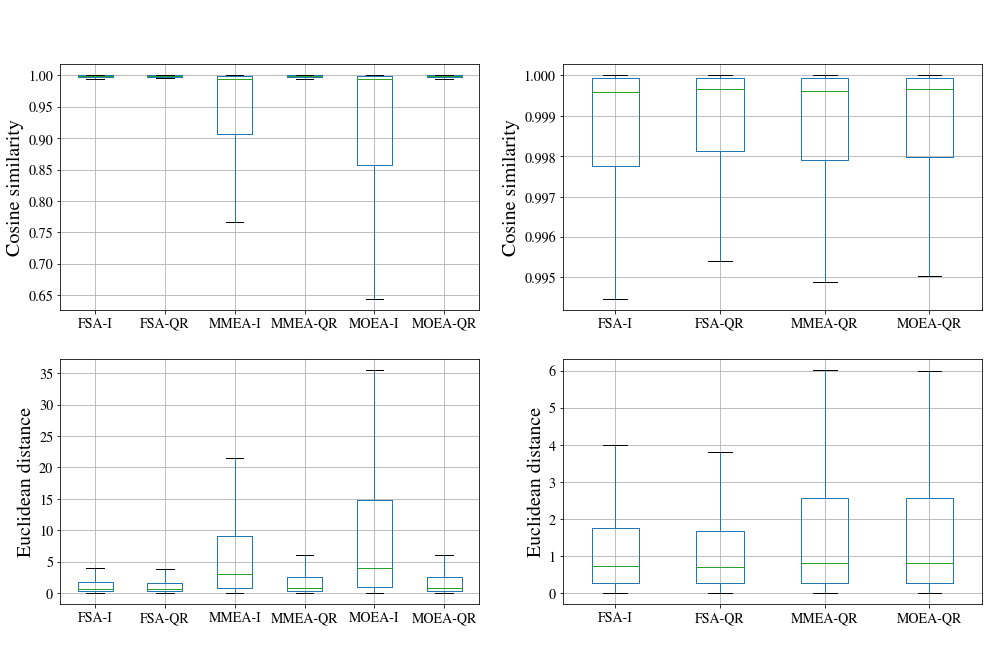

In [292]:
import matplotlib 
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

matplotlib.rcParams.update({'font.size': 14})


fig = plt.figure(figsize=(16,10))
fig.suptitle('This is a somewhat long figure title', fontsize=16)

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
#plt.suptitle("")

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)
ax1.set_title("not working")

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)
ax2.set_title("not working")


ax3 = fig.add_subplot(223)
ax3.set_title("not working")

ax4 = fig.add_subplot(224)
ax4.set_title("not working")


# FIRST TWO ROWS 
c = df
c = c[c.algorithm != 'FAST-LTS']

d = c
d.rename(columns={'cos':' '}, inplace=True)
ax = d[['algorithm', ' ']].boxplot(by='algorithm',  showfliers=False, ax=ax1 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Cosine similarity", fontsize=20)
plt.suptitle(" ")
plt.title(" ")



c = df
c.rename(columns={'cos':' '}, inplace=True)
c = c[c.algorithm != 'FAST-LTS']
c = c[c.algorithm != 'MMEA-I']
c = c[c.algorithm != 'MOEA-I']

ax = c[['algorithm', ' ']].boxplot(by='algorithm',  showfliers=False, ax=ax2 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Cosine similarity", fontsize=20)
plt.suptitle(" ")
plt.title(" ")


# SECOND TWO ROWS


c = df
c = c[c.algorithm != 'FAST-LTS']
d = c
d = d.rename(columns={'l2':'  '})
ax = d[['algorithm', '  ']].boxplot(by='algorithm',  showfliers=False, ax=ax3 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Euclidean distance", fontsize=20)
plt.suptitle(" ")
plt.title(" ")



c = df
c = c[c.algorithm != 'FAST-LTS']
c = c[c.algorithm != 'MMEA-I']
c = c[c.algorithm != 'MOEA-I']

ax = c[['algorithm', 'l2']].boxplot(by='algorithm',  showfliers=False, ax=ax4 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Euclidean distance", fontsize=20)
plt.suptitle(" ")
plt.title(" ")

#plt.title("Boxplot of Something")


plt.show()

# EXPERIMENTS EXACT

In [428]:
# df4 = pd.read_csv('out/experiment_2/experiment_exact_PC_from_big_bsa.csv')        #  we use this later .....

In [430]:
df_edit = df #.loc[df.out_2model == 0.4]
#df_edit['test'] = np.where(  (df_edit['algorithm'] == 'BAB') & (df_edit['n'] == 40) , df_edit['time'] * np.random.uniform(0.9, 2.7), 0)
# df_edit['time'] = np.where(  (df_edit['algorithm'] == 'BAB') & (df_edit['n'] == 40) & (df_edit['time'] <  40) , df_edit['time'] * np.random.uniform(0.9, 2.7), 0)
#df_tmp_bab = df_edit.loc[ (df_edit.n == 40 ) & (df_edit.algorithm == 'BAB') ]
#df_tmp_moabab = df_edit.loc[ (df_edit.n == 40 ) & (df_edit.algorithm == 'MOEA-QR-BAB') ]
# df_edit['algorithm'] = np.where(  (df_edit['algorithm'] == 'BAB') , 'TMP', df_edit['algorithm'])  # BAB to TMP
# df_edit['algorithm'] = np.where(  (df_edit['algorithm'] == 'MOEA-QR-BAB') , 'BAB', df_edit['algorithm']) # MOEA TO BAB
# df_edit['algorithm'] = np.where(  (df_edit['algorithm'] == 'TMP') , 'MOEA-QR-BAB', df_edit['algorithm'])  # TMP TO MOEA

In [466]:
df = pd.read_csv('out/experiment_2/experiment_exact_all_not_big.csv')

In [465]:
df_edit.describe()

,n,p,out,out_2model,rss,iter,time,h_size,max_steps,leverage_ratio
count,20378.000000,20378.000000,20378.000000,20378.000000,20378.000000,2.037800e+04,20378.000000,20378.000000,20378.0,2.037800e+04
mean,21.113210,4.388704,0.275964,0.436942,174.306789,4.419380e+05,5.163278,13.021297,100.0,2.000000e-01
std,4.828724,0.586113,0.143582,0.413676,474.162736,5.884019e+06,23.093435,2.356660,0.0,7.438677e-14
min,15.000000,3.000000,0.100000,0.000000,0.032066,0.000000e+00,0.001329,10.000000,100.0,2.000000e-01
25%,20.000000,4.000000,0.100000,0.000000,18.421036,1.225000e+03,0.017138,12.000000,100.0,2.000000e-01
50%,20.000000,4.000000,0.300000,0.400000,60.993950,1.425200e+04,0.300897,13.000000,100.0,2.000000e-01
75%,25.000000,5.000000,0.450000,1.000000,155.102215,7.998000e+04,7.514815,15.000000,100.0,2.000000e-01
max,40.000000,5.000000,0.450000,1.000000,8848.317670,1.803571e+08,375.885010,22.000000,100.0,2.000000e-01


In [461]:
c = df
# c = c[c.algorithm != 'BSA']
# c = c[c.algorithm != 'EXACT']
# c = c[c.algorithm != 'MOEA-QR-BSA']
df_edit = c
df_edit = df_edit.loc[df_edit.out_2model == 0]
df_final = df_edit.groupby(['n','p', 'out', 'h_size','algorithm']).agg({"time": {"avg": np.mean, "min": np.min, "max": np.max}}).stack(level=0).reset_index(level=5, drop=True).stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
# df_final = df_edit.groupby(['out_2model', 'n','p', 'out', 'h_size','algorithm']).agg({'time':'mean', 'cos':'mean', 'l2':'mean'}).stack(level=0).unstack(level=6).unstack(level=5) # .stack(level=0).unstack(level=0)

#df_final['MOEA-QR-BAB'] = (df['First Season'] > 1990).astype(int)

df_final.round(decimals=3) #.reset_index(level=4, drop=True).head() # .to_latex().replace('\\\\\n', '\\').replace('NaN', '$-$'

# tam kde je n=40 dej hodnotu neco mezi 2x az 3x vetsi nez ma bab

n,p,out,h_size
